# <font color = LightGreen > **CA model of water dynamics and hydrophobic interactions** </font>

Authors:
- H. Malash, 15179192
- S. Bhusal, 14724383
- L. Pahladsingh, 13846566
- T. Glansdorp, 12748587

In [1]:
from model import CA_rules, CA_grid, CA_rules_only_water
import analysis
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics 
import scipy.stats


## <font color = LightBlue > **Background Information** </font>

Our cellular automaton (CA) model simulating an aqueous solution consists of a grid, representing the surface of a torus. Each cell, denoted as '$\textit{i}$' is surrounded by four neighbors '$\textit{j}$ ', and there is an additional cell two positions beyond '$\textit{i}$ ', labeled as '$\textit{k}$ '. We interpret the cell indicated by 'j' as the von Neumann neighborhood, and the cell indicated by 'k' as the extended von Neumann neighborhood.

The state of each cell, represented by binary numbers, signifies its occupancy. There are three possible options for occupancy within the system:

- An empty cell is denoted by 0.
- A cell containing water is indicated by 1.
- A cell containing solute is indicated by 2.

In our model, two parameters influence the movement of molecules within the grid: the $\textbf{breaking probability}$ ($P_B$) and the $\textbf{joining probability}$ ($J$). The combination of these probabilities determines the behavior of cell movement.

The $\textbf{breaking probability}$ ($P_B$) represents the probability of a molecule in cell $\textit{i}$ breaking away from a molecule in cell $\textit{j}$ when only one $\textit{j}$ cell is occupied. We have defined three specific breaking probabilities:

- $P_B(W)$: Water-water breaking probability
- $P_B(L)$: Solute-solute breaking probability
- $P_B(WL)$: Water-solute breaking probability

The  $\textbf{joining probability}$ ($J$) quantifies the ratio between the likelihood of a molecule at $\textit{i}$  moving towards an occupied $\textit{k}$ cell when $\textit{j}$  is empty and the probability of the same molecule at $\textit{i}$  moving towards an empty $\textit{k}$  cell when $\textit{j}$  is unoccupied. 

 is a positive number, when ($J=1$), it indicated that a molecule at $\textit{i}$ has the same probability to move towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. So the state of cell $\textit{k}$ does not matter. 

The parameter ($J$) is a positive number. When $J=1$, it signifies that a molecule at $\textit{i}$ has an equal probability of moving towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. In this case, the state of cell $\textit{k}$ does not influence the movement probability. As before we have three distinct joining probabilities: $J(W)$, $J(L)$ and $J(WL)$.

### <font> **Moving probability** </font> 
Combining $P_B$ and $J$, we obtaining the moving probability of a cell $p_m$: </br>
$p_m$ = sum of $p_m(d)$ over all possible $\textit{d}$ if the sum <1,
else 1 </br>

with

$p_m(d) = 1 / (1 + ((4-n)/(P_B^n) - 1) / J(d)) $ </br>
if n < 4 and $P_B$ > 0  </br>

$\textit{n}$ indicating the number of occupied $\textit{j}$ cells, there are $4-n$ directions for $\textit{i}$ to move. 

In the case where $J=1$, the moving probability ($p_m$) is equal to $P_B^n$. Given that all our research accepts this condition, we will focus on working with joint probabilities involving only $P_B$ to calculate the moving probability of a molecule.

$\textit{Information mainly based on}$: </br>
Kier, L. B., & Cheng, C. K. (1994). A Cellular Automata Model of an Aqueous Solution, Journal of Chemical Information and Computer Science.  34, 1334-1337


## <font color = LightBlue > **Water Grid** </font>

## <font color = LightBlue > **Water-Solute Grid** </font>

### <font color = Pink > **Influence of Water temperature on solubility** </font>

Run number 1
Running simulation at pbw = 0.0


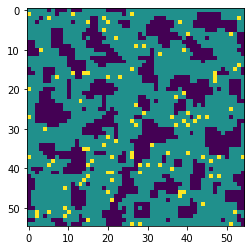

Running simulation at pbw = 0.5


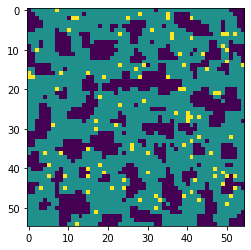

Running simulation at pbw = 1.0


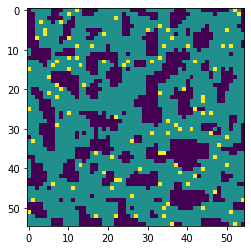

[[8.20000000e+01 7.66650695e-03 9.58313368e-04 0.00000000e+00
  0.00000000e+00]
 [7.90000000e+01 9.10397700e-03 4.79156684e-04 4.79156684e-04
  0.00000000e+00]
 [9.00000000e+01 4.79156684e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


In [6]:
from analysis import calculate_attributes

# Initialization parameters
start_value = 0
end_value = 1
step_size = 0.25
pbw_rates = np.arange(start_value, end_value + step_size, step_size)
num_runs = 5

results_solute = []

for _ in range(num_runs):
    print(f"Run number {_ + 1}")
    for pbw in pbw_rates:
        print(f"Running simulation at pbw = {pbw}")
        ca_grid = CA_grid()
        ca_rules = CA_rules(ca_grid, pbw=pbw)
        final_grid = ca_rules.generate_simulation()
        f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
        output = np.array([f_o, f_1, f_2, f_3, f_4])
        results_solute.append(output)

        # plt.imshow(final_grid)
        # plt.show()
        
results_solute = np.array(results_solute)
print(results_solute)


c:\Users\sanjh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\sanjh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
No handles with labels found to put in legend.


[89. 85.]
[83. 83.]
[86. 86.]
[82. 90.]
[79. 86.]
At pbw=0.0, f_o_solute values: [89. 85.]
Mean f_o_solute: 87.0
Standard deviation f_o_solute: 2.8284271247461903
Confidence interval: 61.58759052713581, 112.4124094728642
At pbw=0.25, f_o_solute values: [83. 83.]
Mean f_o_solute: 83.0
Standard deviation f_o_solute: 0.0
Confidence interval: nan, nan
At pbw=0.5, f_o_solute values: [86. 86.]
Mean f_o_solute: 86.0
Standard deviation f_o_solute: 0.0
Confidence interval: nan, nan
At pbw=0.75, f_o_solute values: [82. 90.]
Mean f_o_solute: 86.0
Standard deviation f_o_solute: 5.656854249492381
Confidence interval: 35.17518105427162, 136.8248189457284
At pbw=1.0, f_o_solute values: [79. 86.]
Mean f_o_solute: 82.5
Standard deviation f_o_solute: 4.949747468305833
Confidence interval: 38.028283422487675, 126.97171657751232


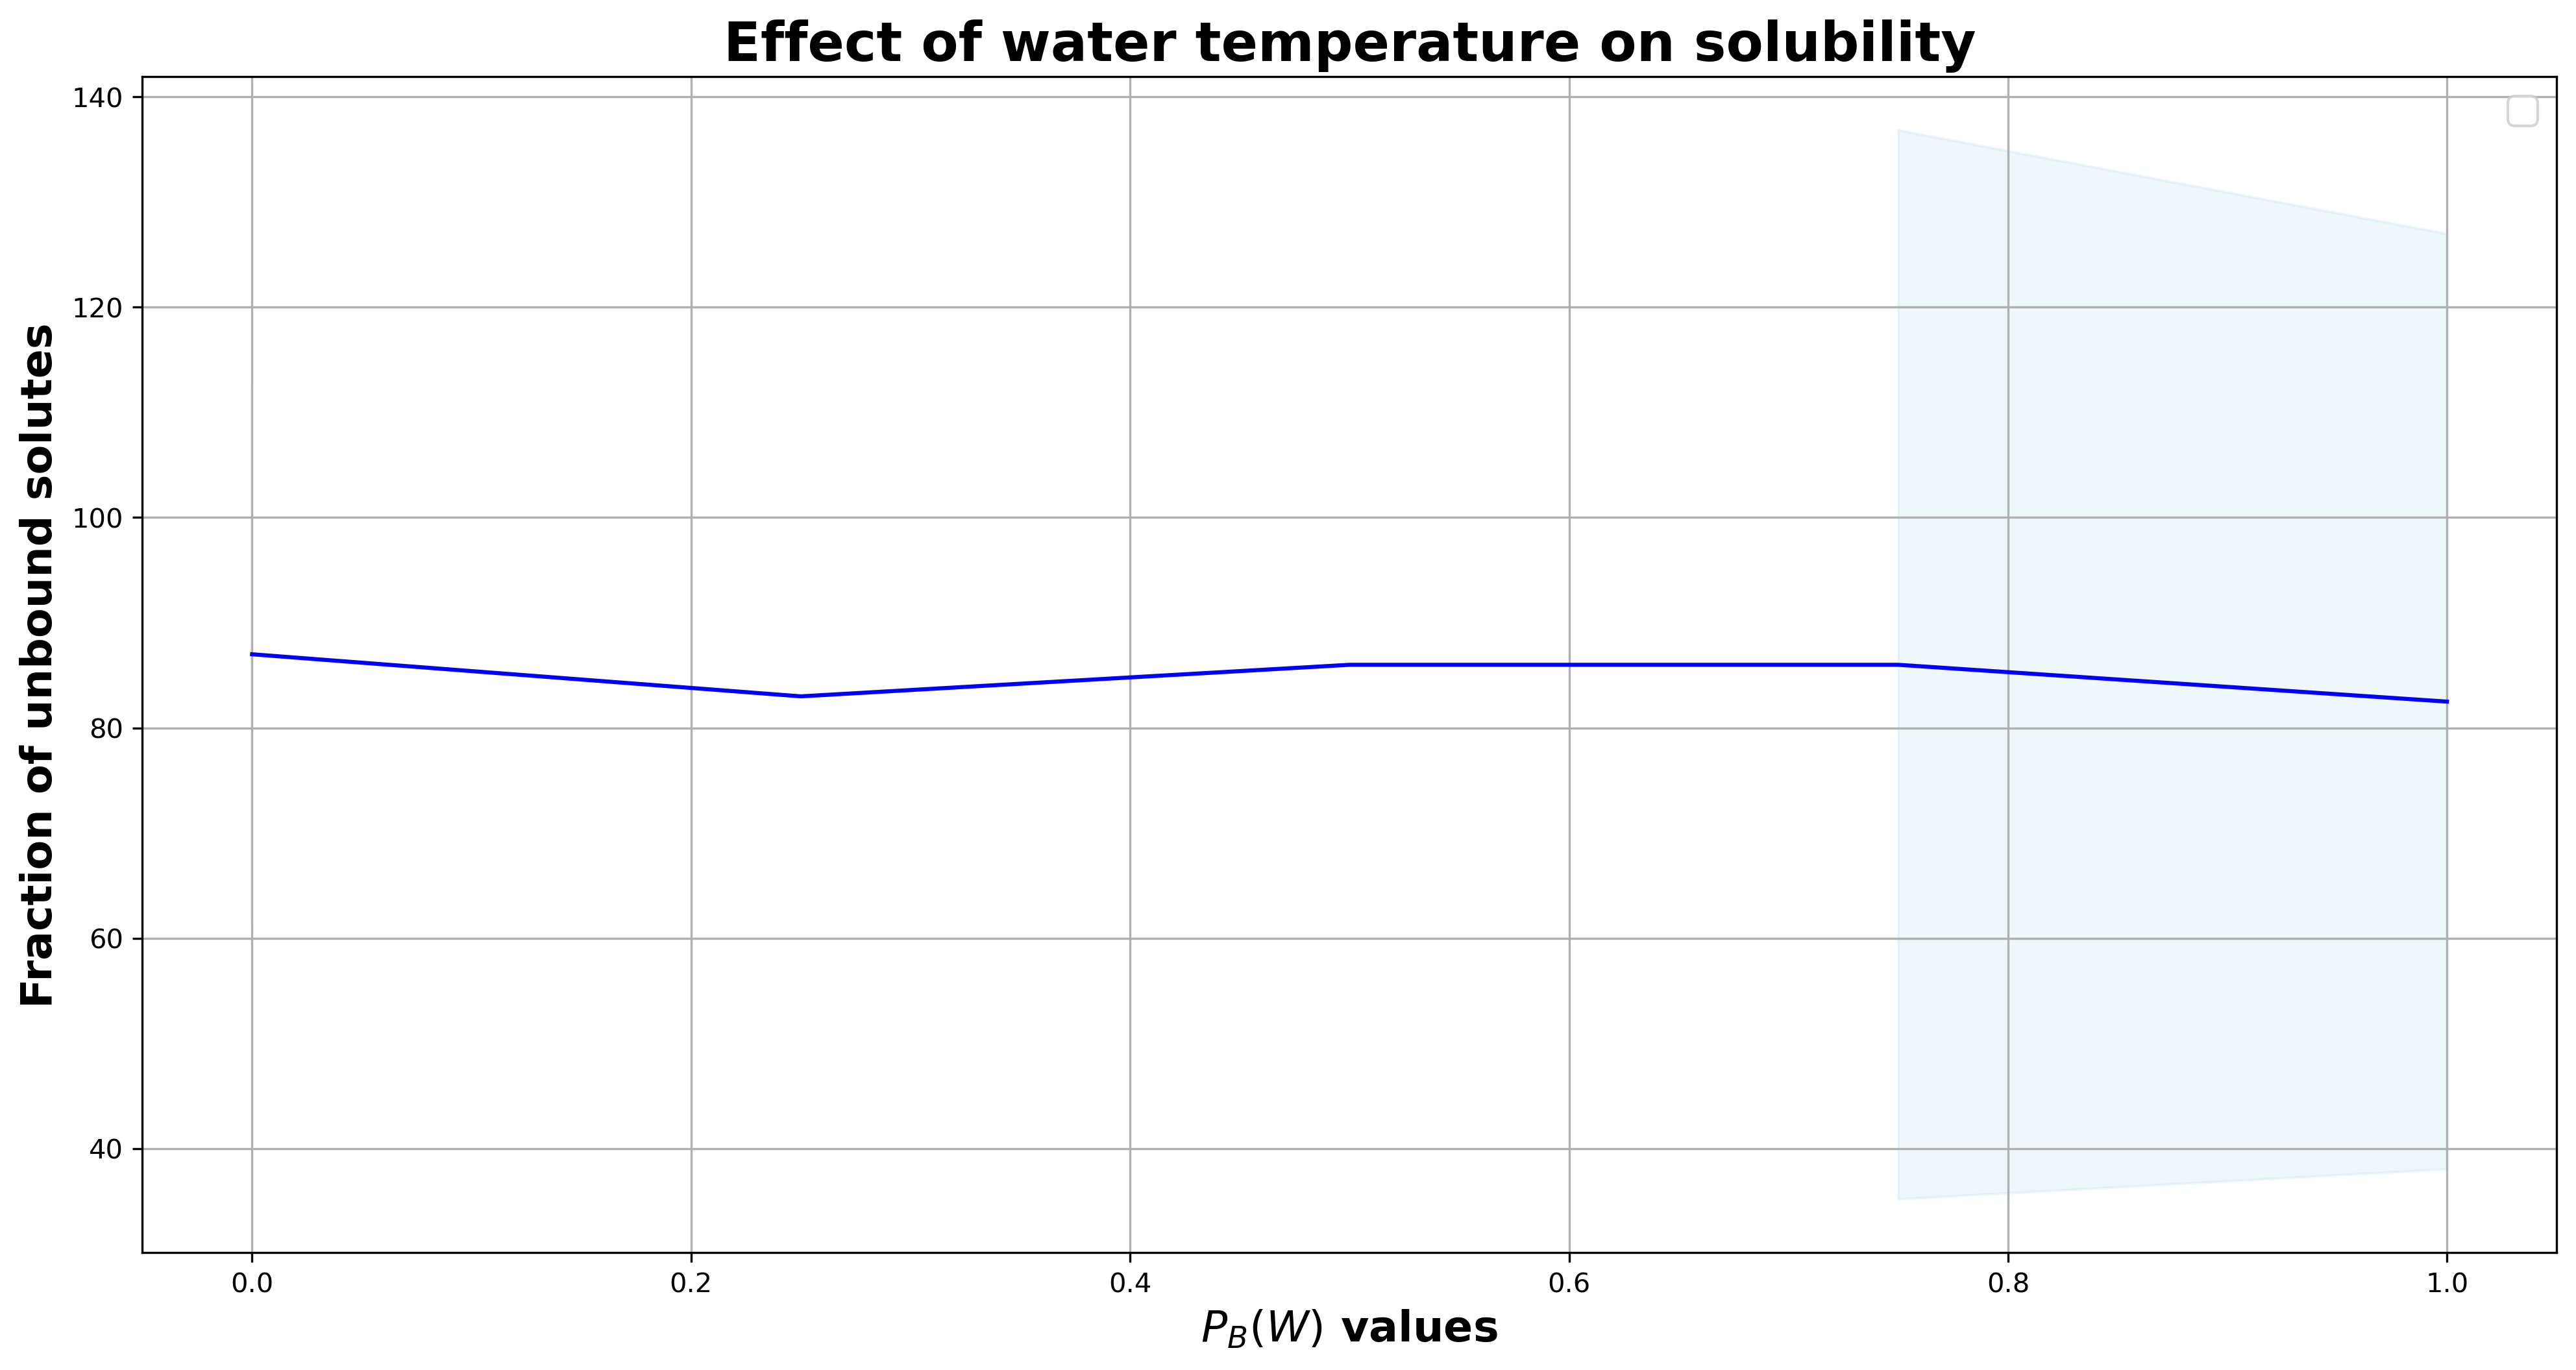

In [5]:

print(results_solute[::5, 0])  # This is the f_o_solute values at pbw=0 for each run
print(results_solute[1::5, 0])  # This is the f_o_solute values at pbw=0.25 for each run
print(results_solute[2::5, 0])  # This is the f_o_solute values at pbw=0.5 for each run
print(results_solute[3::5, 0])  # This is the f_o_solute values at pbw=0.75 for each run
print(results_solute[4::5, 0])  # This is the f_o_solute values at pbw=1 for each run

plt.figure(figsize=(16, 8), dpi=300)

mean_f_o = []
ci_low_f_o = []
ci_upp_f_o = []

pbw_rates1 = np.unique(pbw_rates)

for i, pbw_value in enumerate(pbw_rates1):
    f_o_pbw = results_solute[i::len(pbw_rates1), 0]
    print(f"At pbw={pbw_value}, f_o_solute values: {f_o_pbw}")

    mean_f_o_pbw = statistics.mean(f_o_pbw)
    std_f_o_pbw = statistics.stdev(f_o_pbw)
    ci_low, ci_upp = scipy.stats.t.interval(0.95, len(f_o_pbw) - 1,
                                            loc=mean_f_o_pbw,
                                            scale=std_f_o_pbw / np.sqrt(len(f_o_pbw)))
    
    print(f"Mean f_o_solute: {mean_f_o_pbw}")
    print(f"Standard deviation f_o_solute: {std_f_o_pbw}")
    print(f"Confidence interval: {ci_low}, {ci_upp}")

    mean_f_o.append(mean_f_o_pbw)
    ci_low_f_o.append(ci_low)
    ci_upp_f_o.append(ci_upp)

plt.plot(pbw_rates1, mean_f_o, color='blue')
plt.fill_between(pbw_rates1, ci_low_f_o, ci_upp_f_o, color='lightblue', alpha=0.2)

plt.xlabel("$P_B(W)$ values", fontsize=16, fontweight='bold')
plt.ylabel("Fraction of unbound solutes", fontsize=16, fontweight='bold')
plt.title("Effect of water temperature on solubility", fontsize=20, fontweight='bold')
plt.grid(True)
plt.legend(loc='upper right', prop={"size":14})
plt.show()


### <font color = Pink > **Influence of Solute Concentration** </font>

In [24]:
from analysis import calculate_attributes

solute_concentrations = [0, 50] #, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
results = []
for solute_amount in solute_concentrations:
    print(f"Running simulation with {solute_amount} solute molecules.")
    ca_grid = CA_grid(solute_amount=solute_amount)
    ca_rules = CA_rules(ca_grid)
    final_grid = ca_rules.generate_simulation()

    f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
    output = np.array([f_o, f_1, f_2, f_3, f_4])
    results.append(output)

results = np.array(results)
print(results)


Running simulation with 0 solute molecules.
Running simulation with 50 solute molecules.
[[0.0005 0.0155 0.122  0.3645 0.4975]
 [0.001  0.023  0.1535 0.352  0.4455]]


In [25]:
print(results.T[0])

[0.0005 0.001 ]


In [1]:

plt.plot(solute_concentrations, results.T[0], label='$f_0$')
plt.plot(solute_concentrations, results.T[1], label='$f_1$')
plt.plot(solute_concentrations, results.T[2], label='$f_2$')
plt.plot(solute_concentrations, results.T[3], label='$f_3$')
plt.plot(solute_concentrations, results.T[4], label='$f_4$')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

### <font color = Pink > **Influence of Water-Solute Breaking Probability** </font>

### Counting of unbound water molecules

In [4]:
see_grid = CA_rules_only_water(CA_grid()).generate_simulation()
plt.imshow(see_grid)
plt.show()
total_height = 55
total_width = 55

unbound_water = analysis.count_unbound_water(see_grid, total_height, total_width)

NameError: name 'CA_rules_only_water' is not defined